In [2]:
! git clone https://github.com/sathvikg/ChatBot-using-neural-network.git

Cloning into 'ChatBot-using-neural-network'...


In [3]:
# things we need for NLP

import nltk
from nltk.stem.lancaster import LancasterStemmer
stemmer = LancasterStemmer()

# things we need for Tensorflow
import numpy as np
import tensorflow as tf
import random
import warnings
warnings.filterwarnings("ignore")

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


TRAINING DATA


In [5]:

# import training dataset
import json
with open('/content/drive/My Drive/NLP Project/compute help desk.json') as json_data:
    intents = json.load(json_data)

In [ ]:
type(intents["intents"])

list

In [6]:
nltk.download('punkt')
vocab = []  # for vocabulary
classes = [] #tags
documents = [] # contain questions/ user inputs and the tags
ignore_words = ['?']  #remove punctuations
# loop through each sentence in our intents patterns
for intent in intents['intents']:
    for pattern in intent['patterns']:
        # tokenize each word in the sentence
        w = nltk.word_tokenize(pattern)
        # add to our words list
        vocab.extend(w)
        # add to documents in our corpus
        documents.append((w, intent['tag']))
        # add to our classes list
        if intent['tag'] not in classes:
            classes.append(intent['tag'])

# stem and lower each word and remove duplicates
vocab = [stemmer.stem(w.lower()) for w in vocab if w not in ignore_words]  #converting the words to lower and then stemming the words
vocab = sorted(list(set(vocab)))  #converting it to set so that it removes the duplicate words, and then again converting it to list


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [7]:
classes = sorted(list(set(classes)))

print (len(documents), "documents")
print(documents)
print (len(classes), "classes", classes)
print (len(vocab), "unique stemmed words", vocab)

90 documents
[(['Hi', 'there'], 'greeting'), (['Hello'], 'greeting'), (['Hola'], 'greeting'), (['Hey'], 'greeting'), (['Hi'], 'greeting'), (['Hello'], 'greeting'), (['Good', 'morning'], 'greeting'), (['Good', 'Evening'], 'greeting'), (['Bye'], 'goodbye'), (['See', 'you', 'later'], 'goodbye'), (['Goodbye'], 'goodbye'), (['Nice', 'chatting', 'to', 'you', ',', 'bye'], 'goodbye'), (['Till', 'next', 'time'], 'goodbye'), (['Bye', 'Chatbot'], 'goodbye'), (['no', 'bye'], 'goodbye'), (['Thanks'], 'thanks'), (['Thank', 'you'], 'thanks'), (['That', "'s", 'helpful'], 'thanks'), (['Awesome', ',', 'thanks'], 'thanks'), (['Thanks', 'for', 'helping', 'me'], 'thanks'), (['q'], 'noanswer'), (['random'], 'noanswer'), (['How', 'you', 'could', 'help', 'me', '?'], 'options'), (['What', 'you', 'can', 'do', '?'], 'options'), (['What', 'help', 'you', 'provide', '?'], 'options'), (['How', 'you', 'can', 'be', 'helpful', '?'], 'options'), (['What', 'support', 'is', 'offered'], 'options'), (['What', 'services', 'd

In [8]:
# create our training data
training = []
# create an empty array for our output
output = [0] * len(classes)

# training set, bag of words for each sentence
for doc in documents:
    # initialize our bag of words
    bag = []
    # list of tokenized words for the pattern
    pattern_words = doc[0]
    # stem each word
    pattern_words = [stemmer.stem(word.lower()) for word in pattern_words]
    # create our bag of words array
    for w in vocab:
        bag.append(1) if w in pattern_words else bag.append(0)

    # output is a '0' for each tag and '1' for current tag
    output_row = list(output)
    output_row[classes.index(doc[1])] = 1

    training.append([bag, output_row])

# shuffle our features and turn into np.array
random.shuffle(training)
training = np.array(training)

# create train and test lists
train_x = list(training[:,0])
train_y = list(training[:,1])

In [9]:
print("training data input:",train_x[0])
print("training data output",train_y[0])

training data input: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0]
training data output [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


TESTING DATA 



In [10]:
#import test data
with open('/content/drive/My Drive/NLP Project/test1.json') as json_data2:
  test = json.load(json_data2)

In [ ]:
type(test["intents"])

list

In [11]:
testing = []

vocab2 = []  # for vocabulary
classes2 = [] #tags
documents2 = [] # contain questions/ user inputs and the tags
ignore_words2 = ['?']  #remove punctuations
# loop through each sentence in our intents patterns
for intent in test['intents']:
    for pattern in intent['patterns']:
        # tokenize each word in the sentence
        w = nltk.word_tokenize(pattern)
        # add to our words list
        vocab2.extend(w)
        # add to documents in our corpus
        documents2.append((w, intent['tag']))
        # add to our classes list
        if intent['tag'] not in classes2:
            classes2.append(intent['tag'])

# stem and lower each word and remove duplicates
vocab2 = [stemmer.stem(w.lower()) for w in vocab2 if w not in ignore_words2]  #converting the words to lower and then stemming the words
vocab2 = sorted(list(set(vocab2))) 


In [12]:
classes2 = sorted(list(set(classes2)))

print (len(documents2), "documents2")
print(documents2)
print (len(classes2), "classes", classes2)
print (len(vocab2), "unique stemmed words2", vocab2)

53 documents2
[(['hai'], 'greeting'), (['helloi'], 'greeting'), (['heya'], 'greeting'), (['see', 'you'], 'goodbye'), (['bye', 'bye'], 'goodbye'), (['okay', 'thanks'], 'thanks'), (['that', 'helps'], 'thanks'), (['thanks', 'for', 'reply'], 'thanks'), (['this', 'is', 'not', 'working'], 'noanswer'), (['no', 'not', 'working'], 'noanswer'), (['what', 'is', 'your', 'job', '?'], 'options'), (['what', 'do', 'you', 'do'], 'options'), (['how', 'can', 'you', 'help', 'me'], 'options'), (['password', 'reset', 'issue'], 'Password Reset'), (['my', 'password', 'is', 'not', 'working'], 'Password Reset'), (['i', 'dont', 'remember', 'password'], 'Password Reset'), (['how', 'to', 'change', 'password'], 'Password Reset'), (['I', 'can', 'not', 'login'], 'Password Reset'), (['skdf', '@', 'gmail.com'], 'E-mail id'), (['sathvi', '@', 'yahoo.com'], 'E-mail id'), (['youme', '@', 'outlook.com'], 'E-mail id'), (['screen', 'blacked', 'out'], 'Blue Sreen issue'), (['my', 'screen', 'went', 'blue'], 'Blue Sreen issue')

In [13]:
# create our training data
testing = []
#output = []
# create an empty array for our output
output2 = [0] * len(classes)
print(len(output2))
# training set, bag of words for each sentence
for doc in documents2:
    # initialize our bag of words
    bag2 = []
    # list of tokenized words for the pattern
    pattern_words2 = doc[0]
    # stem each word
    pattern_words2 = [stemmer.stem(word.lower()) for word in pattern_words2]
    # create our bag of words array
    for w in vocab:
        bag2.append(1) if w in pattern_words2 else bag2.append(0)

    # output is a '0' for each tag and '1' for current tag
    output_row2 = list(output2)
    output_row2[classes.index(doc[1])] = 1

    testing.append([bag2, output_row2])

# shuffle our features and turn into np.array
random.shuffle(testing)
testing = np.array(testing)

# create train and test lists
test_x = list(testing[:,0])
test_y = list(testing[:,1])


18


In [14]:
len(test_x[0])

137

In [ ]:
len(train_x[0])

137

In [16]:
!pip install livelossplot
import livelossplot
plot_losses = livelossplot.PlotLossesKeras()
plot_losses

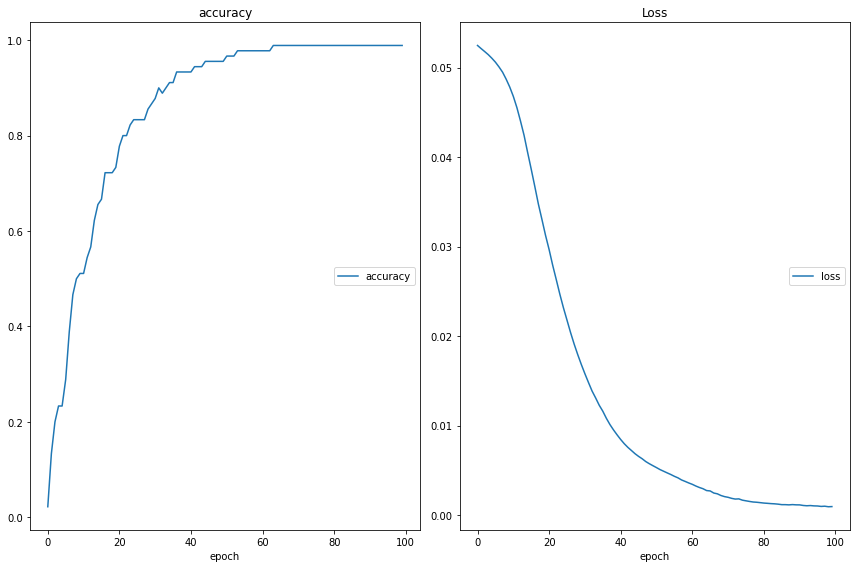

accuracy
	accuracy         	 (min:    0.022, max:    0.989, cur:    0.989)
Loss
	loss             	 (min:    0.001, max:    0.052, cur:    0.001)
12/12 [==============================] - 0s 35ms/step - loss: 9.5147e-04 - accuracy: 0.9889


In [17]:

#sequential neural network model

model = tf.keras.Sequential([tf.keras.layers.Dense(16, input_shape = (None,len(train_x[0]))), # input layer 
                             tf.keras.layers.Dense(10), #hidden layer

                             tf.keras.layers.Dense(len(train_y[0]),activation="softmax"),]) #output layer
model.compile(optimizer = "adam",loss = "mean_squared_error",metrics = ['accuracy'])
model.fit(train_x, train_y, epochs=100, batch_size=8,callbacks=[plot_losses])
model.save('model.keras')




In [18]:
# Evaluation of the model with test data

scores = model.evaluate(test_x,test_y)
print("test loss:",scores[0])
print("test accuracy:", scores[1])

2/2 [==============================] - 0s 3ms/step - loss: 0.0124 - accuracy: 0.8491
test loss: 0.012430863454937935
test accuracy: 0.849056601524353


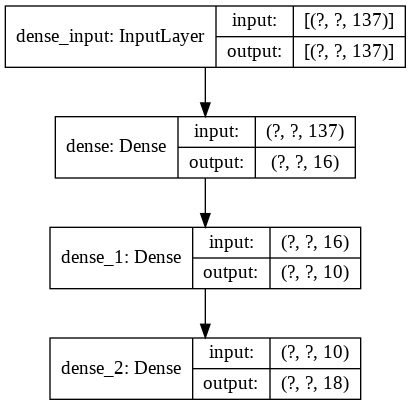

In [19]:
from keras.utils.vis_utils import plot_model

plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)


In [20]:
# save all of our data structures
import pickle
pickle.dump( {'vocab':vocab, 'classes':classes, 'train_x':train_x, 'train_y':train_y}, open( "training_data", "wb" ) )


In [21]:
#restore all of our data structures
import pickle
data = pickle.load( open( "training_data", "rb" ) )
vocab = data['vocab']
classes = data['classes']
train_x = data['train_x']
train_y = data['train_y']

# import our chat-bot intents file
import json
with open('/content/drive/My Drive/NLP Project/compute help desk.json') as json_data:
    intents = json.load(json_data)

In [22]:
# convert user input to BOW
def clean_up_sentence(sentence):
    # tokenize the pattern
    sentence_words = nltk.word_tokenize(sentence)
    # stem each word
    sentence_words = [stemmer.stem(word.lower()) for word in sentence_words]
    return sentence_words

# return bag of words array: 0 or 1 for each word in the bag that exists in the sentence
def bow(sentence, words, show_details=False):
    # tokenize the pattern
    sentence_words = clean_up_sentence(sentence)
    # bag of words
    bag = [0]*len(words)  
    for s in sentence_words:
        for i,w in enumerate(words):
            if w == s: 
                bag[i] = 1
                if show_details:
                    print ("found in bag: %s" % w)
    bag = np.array(bag)
    bag= bag.tolist()
    return(bag)

In [ ]:
words

In [ ]:
data['vocab']

In [27]:
x = bow("password reset issue",vocab)
print(x)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [ ]:
#p = p.tolist()

In [ ]:
a = bow("hello",words)
print(a)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [25]:
rate = 0.25
def classify(sentence):
    # generate probabilities from the model
    results = model.predict([bow(sentence, vocab)])[0]
    print(results)
    # filter out predictions below a threshold
    results = [[i,r] for i,r in enumerate(results) if r>rate]
    # sort by strength of probability
    results.sort(key=lambda x: x[1], reverse=True)
    return_list = []
    for r in results:
        return_list.append((classes[r[0]], r[1]))
    
    return return_list

def response(sentence, userID='123', show_details=False):
    results = classify(sentence)
    # if we have a classification then find the matching intent tag
    if results:
        # loop as long as there are matches to process
        while results:
            for i in intents['intents']:
                # find a tag matching the first result
                if i['tag'] == results[0][0]:
                    # a random response from the intent
                    return print(random.choice(i['responses']))

            results.pop(0)

In [26]:
classify("forgot password")

[5.9494157e-03 3.1161769e-03 4.4338574e-04 1.0089382e-06 9.6163362e-01
 1.5690057e-04 3.3022756e-05 1.5246590e-04 9.0422918e-04 3.7228292e-05
 7.5558200e-03 7.4955262e-03 7.5809639e-03 3.8571228e-04 2.9704487e-03
 7.5143784e-05 9.4487390e-05 1.4144221e-03]


[('Password Reset', 0.9616336)]

In [ ]:
def start_chat():
  print(":start")
  while True:
    inp = input("me:")
    if inp.lower() == "quit":
      
      break

    result = model.predict([[bow(inp,words)]])
    
    result_ind = np.argmax(result)
    tag = classes[result_ind]
    
    for tg in intents["intents"]:
      if tg["tag"] == tag:
        responses = tg["responses"]

    print(random.choice(responses))
    


start_chat()

:start
me:how to fix internet
Happy to help
me:no thanks
My pleasure! Any other Issues I can help with?
me:thanks bye
Happy to help! Any other issues?
me:quit


In [ ]:
classify("no internet")

[3.7960336e-04 2.2893853e-02 8.8709295e-03 1.8906398e-02 8.2047045e-04
 7.1274908e-04 4.5966650e-03 2.2354713e-01 1.0124195e-02 6.8057161e-03
 4.1160408e-02 2.5046514e-03 5.1433342e-03 2.2785766e-01 4.0274301e-01
 6.7561702e-04 1.7117573e-02 5.1400145e-03]


[('greeting', 0.402743)]

In [ ]:
classify("how to fix internet")

[0.00239417 0.11286639 0.00534646 0.01295691 0.00628141 0.00318066
 0.01708726 0.15098771 0.00623795 0.02179063 0.09058343 0.00894386
 0.01329139 0.20899822 0.16422486 0.00499671 0.15808937 0.01174257]


[]

In [ ]:
for i in intents["intents"]:
  if i["tag"] == "greeting":
    responses = i["responses"]
print(responses)

['Hello, Welcome to Our IT Chatbot', 'Good to see you, Welcome to our IT Chatbot', 'Hi there, how can I help?']


In [ ]:
classify('password reset not working')


[7.4768193e-02 1.3664481e-04 3.5664258e-03 2.5261484e-02 8.4836531e-01
 3.8640248e-03 6.8537309e-04 5.7858557e-07 2.4700552e-04 3.8341922e-04
 2.6615470e-04 1.5436683e-02 1.1826526e-02 2.4873967e-04 1.9195255e-05
 1.4117069e-02 1.5349139e-04 6.5375183e-04]


[('Password Reset', 0.8483653)]

In [ ]:
classify("how to get rid of virus")

[2.2727030e-03 2.1903118e-02 2.9053682e-04 1.0953891e-02 4.1150925e-01
 6.9371090e-05 5.8179919e-04 1.5078457e-05 9.5282972e-05 2.1308531e-05
 6.8821008e-03 3.4629211e-03 4.7281271e-01 4.7690231e-02 1.3426101e-03
 4.6567908e-03 1.5346044e-02 9.4335228e-05]


[('Virus', 0.4728127), ('Password Reset', 0.41150925)]

In [ ]:
classify("keyboard not working")

[1.32862534e-02 4.09620209e-03 2.84826402e-02 3.13553810e-01
 3.49272019e-03 4.77488078e-02 2.81457393e-03 1.42018562e-02
 1.18241325e-01 1.44696550e-03 7.24977478e-02 3.31044763e-01
 3.45820300e-02 1.15754257e-03 4.18113358e-03 1.30365882e-03
 1.11196750e-04 7.75681250e-03]


[('Vague', 0.33104476), ('Mouse', 0.3135538)]